<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/SummerInternship2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pine Biotech Summer Reasearch

**Cindy Pino**


Abstract: In this study, we will analyze the gene expression differnt coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, we focuses the analysis on samples from SARS-CoV-1, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 was downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO [GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the MERS infections were downloaded from GEO [GSE139516](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE139516), including their corresponding Mock-treated controls.

In this Jupyter notebook, I will use both R and Python to analyze three viruses: MERS, SARS-CoV-1,  and SARS-CoV-2. I selected the transcriptomic data (gene expression), taking raw FASTQ files of the sequenced of mock and virus infected tissues. I analyzed this sequences to understand how genes are expressed in these three different tissues infected with the coronaviruses. Differences in gene expression are useful to understand how samples are comparable to each other; however, the downside to gene expression patters is the thousands of genes and how to sort through manually. I used Principal Component Analysis - a dimensionality reduction method to help with the cleaning and analysis. 

##Preparing the Notebook
First, let's active R magic. Don't forget to use %%R before running a R code 


---

In [38]:
#active R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


###Python

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###R

In [54]:
%%R
# Example package installation and plotting
install.packages("ggplot2")
#ggplot2::ggplot(mtcars, ggplot2::aes(x = am, y = disp)) + ggplot2::geom_point()

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [55]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

R[write to console]: Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

R[write to console]: Installing package(s) 'DESeq2'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.10/bioc/src/contrib/DESeq2_1.26.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2060061 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

In [56]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("EnhancedVolcano")




R[write to console]: Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

R[write to console]: Installing package(s) 'EnhancedVolcano'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.10/bioc/src/contrib/EnhancedVolcano_1.4.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6792911 bytes (6.5 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [57]:
%%R
install.packages("tidyverse")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [58]:
%%R
install.packages('dplyr')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 935654 bytes (913 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [63]:
%%R
install.packages('ggplot2')


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri


## SARS-CoV
Severe Acute Respiratory Syndrom Coronavirus (SARS-CoV) was first identified in 20013 (WHO). 

**Pipeline Workflow**



*   PreProcessing
    
      * PCR clean - to remove duplicates from the PCR run  thus reducing redundancy. 
      * Trimmomatic - removes adapter sequences
*   Mapping 
      * Bowtie-2t
* Quantification 

    * RSEM -  Fragment Per Kilobase of transcript per Million mapped reads  for Paired-End Reads







### Upload and clean the file 
The dataset contains the ene expression of SARS and Mocks samples. 

* log transformation and noralization
* filter out genes with very low expression (indistinguishable from noise
* RNA-seq visualization 
    * histagram, boxplot, heatmap 



In [103]:
%%R
df = read.table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt',skip = 1, header = TRUE)


NULL


In [75]:
%%R
# use glimse to quickly look at the column names and data type
#glimpse(df)

NULL


In [ ]:
%%R
# Cleaning the file for processing
ColNames1 <- df$id #take the column name
df = df[,-1] #take the data part - numeric values
df=as.matrix(df)
df

Streaming output truncated to the last 5000 lines.
 [4107,]   1157.00   1172.00    964.00    937.00   1006.00   1012.00    620.00
 [4108,]   1810.00   1756.00   1627.00   1524.00   1507.00   1507.00   1066.00
 [4109,]      4.00      5.00      4.00      2.00      3.00      6.00      5.00
 [4110,]   1162.09   1120.00   1088.58    989.00   1028.00   1021.00    653.00
 [4111,]   1248.00   1179.00   1415.00   1436.00   1122.00   1143.00    771.00
 [4112,]     11.53     12.85      7.83      3.02      6.85      5.36     12.53
 [4113,]    120.00    116.00     66.00     72.00     88.00     99.00    101.00
 [4114,]    313.00    299.88    391.00    340.79    253.01    269.00    274.00
 [4115,]      2.00      0.00      2.00      2.00      1.00      0.00      0.00
 [4116,]      0.00      0.00      0.00      0.00      1.00      0.00      0.00
 [4117,]    277.00    225.00    237.00    247.00    235.00    232.00    148.00
 [4118,]  13020.12  12881.88  13179.86  13174.41  11615.96  11342.91  10294.69
 

In [77]:
%%R
# filter values higher or less than #
#data = df[which(df[,2]>1),]
#data = df[which(df[,2]<1),]


NULL


In [78]:
%%R
#remove a header 
names(df) <- NULL


In [82]:
%%R
#remove NAs from dataset
cleandata <- na.exclude(df)

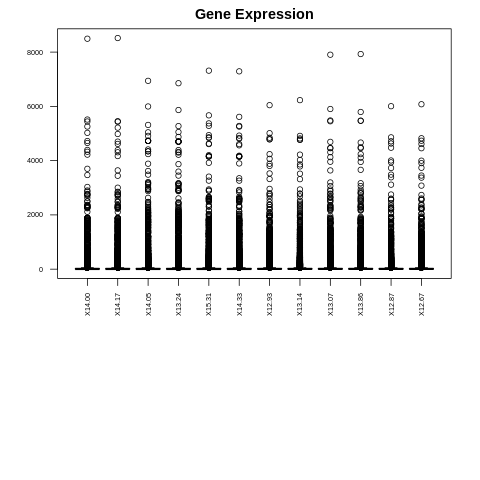

In [83]:
%%R
#Basic Settings:

colors <- c(rep('red',6),rep('blue',3),rep('green',2),rep('gray',2))
par(mar=c(14,4,2,2))
boxplot(df, main="Gene Expression",las = 2, cex.axis=0.6)


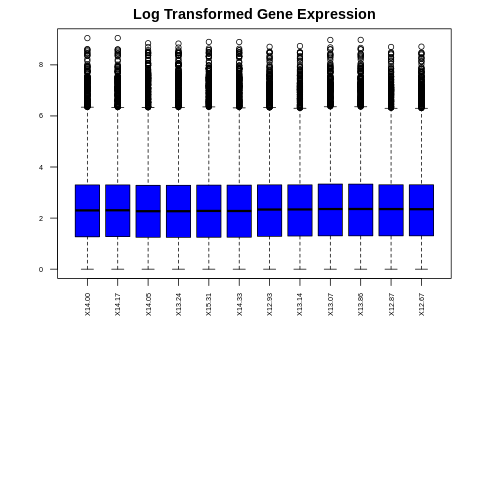

In [84]:
%%R
#Log transformation
logdata <- log(df+1)
par(mar=c(14,4,2,2))
boxplot(logdata, main="Log Transformed Gene Expression", col = 'blue', las = 2, cex.axis=0.6)


In [85]:
%%R
#Descriptive statistics
summary(df)

     X14.00            X14.17            X14.05            X13.24       
 Min.   :   0.00   Min.   :   0.00   Min.   :   0.00   Min.   :   0.00  
 1st Qu.:   2.55   1st Qu.:   2.58   1st Qu.:   2.48   1st Qu.:   2.47  
 Median :   8.98   Median :   9.03   Median :   8.67   Median :   8.67  
 Mean   :  46.00   Mean   :  45.98   Mean   :  49.29   Mean   :  49.19  
 3rd Qu.:  26.11   3rd Qu.:  26.11   3rd Qu.:  25.63   3rd Qu.:  25.67  
 Max.   :8494.14   Max.   :8518.84   Max.   :6941.47   Max.   :6853.46  
     X15.31             X14.33            X12.93             X13.14        
 Min.   :   0.000   Min.   :   0.00   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   2.487   1st Qu.:   2.49   1st Qu.:   2.610   1st Qu.:   2.660  
 Median :   8.785   Median :   8.75   Median :   9.325   Median :   9.365  
 Mean   :  47.898   Mean   :  47.84   Mean   :  43.011   Mean   :  43.016  
 3rd Qu.:  25.885   3rd Qu.:  25.90   3rd Qu.:  26.163   3rd Qu.:  26.170  
 Max.   :7316.370   Max.   :7291.

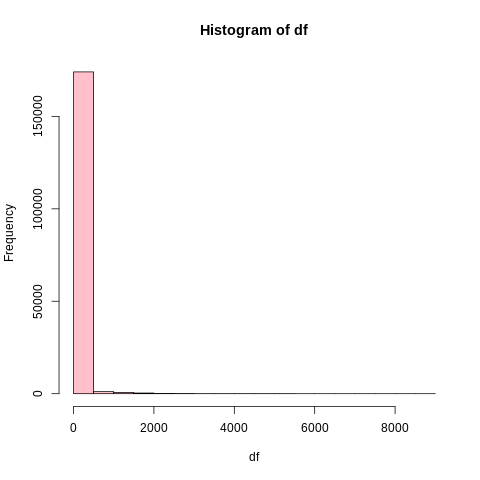

In [86]:
%%R
hist(df, col='pink')


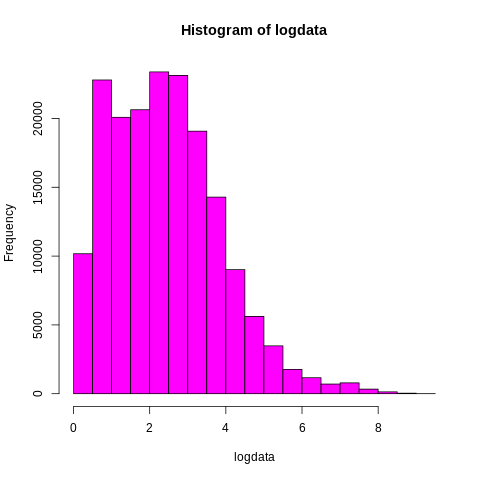

In [87]:
%%R
hist(logdata, col='magenta')

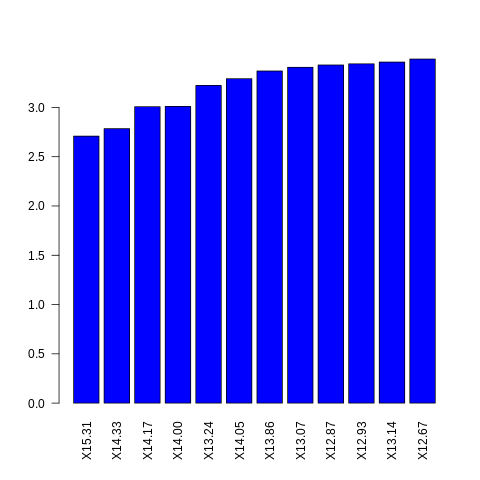

In [88]:
%%R
barplot(sort(logdata[100,]), col = "blue", main = ColNames1[2], font.axis=1, cex.axis=1, las=2)


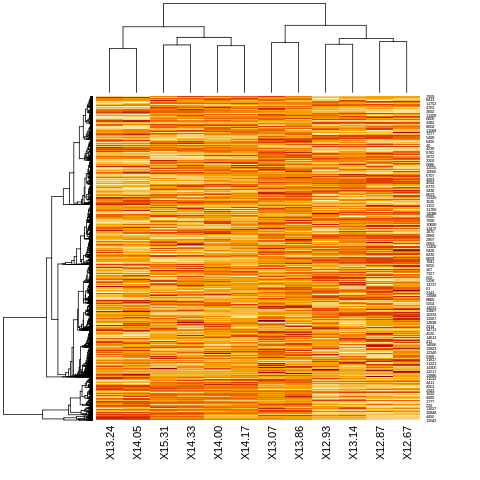

In [89]:
%%R
heatmap(logdata)

###DESEQ2

In [ ]:
%%R
#Load dataset
PDXdataset = read.table('https://drive.google.com/uc?export=download&id=1tb_qnLwjeAf0B5gWmi7_6SGOqy44dU8x', header = TRUE,row.names = 1, sep='\t')


In [ ]:
%%R
#Define data and remove id column
data <- (PDXdataset)
colnames(PDXdataset) -> names
meta_classes<- c('ER','ER','ER','ER', 'ER', 'ER', 'ER', 'TN','TN','TN','TN','TN', 'TN', 'TN')
meta_data <- data.frame(names, meta_classes)


In [ ]:
%%R
library(ggrepel)
library(EnhancedVolcano)

In [ ]:
%%R
#Perform first step of DESeq (Define DESeq dataset)
ds <- DESeqDataSetFromMatrix(countData=data, colData=meta_data, design=~meta_classes)
#Perform DEseq and create results object
Ds <- DESeq(ds)
res <- results(Ds)
print(res)                  
#Output results in.txt format
write.table(res,"DESeq2_PDX_R.txt", row.names=TRUE,col.names=NA, sep="\t", quote=TRUE, append=TRUE)                      
#Create MA plot
plotMA(res)     
#Create enhance volcano plot with identified differentially expressed genes
EnhancedVolcano(res, x = 'log2FoldChange',
             y = 'pvalue', lab = rownames(res)
              , xlim = c(-5, 8))                      


### Principal Component Analysis

It is not practical to try and visualize all genes, we have to reduce the complexity (or dimensionality) of this data. 


---

PCA is a technique that calsulates the best set of projections in the data to show maximal variance between samples. It simplifies a high dimension dataset to best visualize the data. The objective of PCA is to find a common dimension, so called principal component, in the form of linear combinations of the variables under investigation, and to rank them according to their importance. 


In [92]:
%%R
head(df,2)

     X14.00 X14.17 X14.05 X13.24 X15.31 X14.33 X12.93 X13.14 X13.07 X13.86
[1,]  42.43  41.34  51.64  50.84  42.00  42.58  59.62  59.73  51.21  50.55
[2,]   3.07   2.84   2.63   2.63   2.88   3.25   2.65   2.85   2.65   2.95
     X12.87 X12.67
[1,]  56.24  55.60
[2,]   2.65   2.59


In [90]:
%%R
install.packages("ggplot2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [91]:
%%R
install.packages("magrittr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/magrittr_1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 200504 bytes (195 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
install.packages("ggpubr")

In [ ]:
%%R
install.packages("ggfortify")

In [ ]:
%%R
install.packages("cluster")

In [ ]:
%%R

options(echo=FALSE) 
args <- commandArgs(trailingOnly = TRUE)

In [ ]:
%%R
args [1] = ('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.csv') #input file
args [2] = 'YES' #transpose (YES/NO) 
args [3] = 'YES' #center (YES/NO) 
args [4] = 'YES'  #scale (YES/NO)
args [5] = 3 #number of axis to draw 

In [ ]:
%%R
MaxGroupsForLegend <- 50

In [ ]:
%%R
#Read dataframe
data <- read.table (args [1], header = TRUE, row.names=1, stringsAsFactors=FALSE, check.names=FALSE)


In [ ]:
%%R
#Prepare dataframe
if (args [2] == "YES") {
  if ((rownames (data)[1] ==  "group") || (rownames (data)[1] ==  "Group") || (rownames (data)[1] ==  "GROUP")) {
    Group = t (data [1,])
    cnames =colnames (data)
    data <- read.table (args[1], header = FALSE, row.names=1, skip=2, stringsAsFactors=FALSE, check.names=FALSE)
    colnames (data) = cnames        
    
    data = data.frame (Group, t (data))
  } else {
    data = t (data)
  }
}
if ((colnames (data) [1] == "group") || (colnames (data) [1] == "Group") || (colnames (data) [1] == "GROUP")) {
  Group = data [, 1]
  data = data [, -1]
  data = transform (data, as.numeric)
  LegendTitle="Group"
} else {
  Group = rownames (data)
  LegendTitle="Sample"
}
Group = as.factor (Group)

          

In [ ]:
%%R

#Parse centering and scaling arguments
if(args [3] == "YES") {
  cent = TRUE
} else {
  cent = FALSE
}
if(args [4] == "YES") {
  sc = TRUE
} else {
  sc = FALSE
}

In [ ]:
%%R
#Main computation - perform PCA
pca <- prcomp (data, scale. = sc, center=cent)
pca_res = data.frame (pca$x, Group) 

In [ ]:
%%R

#Draw PCA plots
todraw = as.numeric (args[5])
if (todraw < 2) {
  todraw = 2
}
if (todraw > length (colnames (pca$x))) {
  todraw = length (colnames (pca$x))
}

pdf ("PCA_plots.pdf")


In [ ]:
%%R
# Add variation percent to PC names
ei = pca$sdev^2
vp = ei / sum(ei) * 100.0
prevnames <- colnames (pca$x)
newnames <- paste (colnames (pca$x), "(", round (vp, digits=2), "%)", sep="")
newnames_prt <- paste (colnames (pca$x), " (", round (vp, digits=2), "%)", sep="")


if (length (unique (Group)) <= MaxGroupsForLegend) {
  legend_pos <- "bottom"
} else {
  legend_pos <- "none"
}

for (i in 1:(todraw-1)) {
  for (j in (i+1):todraw) {
    plot = ggplot (data.frame (pca$x), aes_string(x=colnames (pca$x) [i], y=colnames(pca$x)[j], colour = "Group")) + geom_point() + labs(x=newnames_prt[i], y=newnames_prt[j], color=LegendTitle) + theme(legend.position=legend_pos)
    print (plot)
  }
}

tmp <- dev.off ()

In [ ]:
%%R
#Save PCA table
colnames (pca$x) <- newnames
cat ("Obj\t", file="PCA_table.txt", append=FALSE)
write.table(pca$x, file="PCA_table.txt", row.names=TRUE, col.names=TRUE, sep="\t", quote=FALSE, append=TRUE)
colnames (pca$x) <- prevnames


In [ ]:
%%R
#Save some additional information
cat ("Component\t", file="PCA_additional.txt", append=FALSE)
cat (colnames(pca$x), file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("SDev\t", file="PCA_additional.txt", append=TRUE)
cat (pca$sdev, file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("VariancePerccent\t", file="PCA_additional.txt", append=TRUE)
cat (vp, file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("CumulVariancePerccent\t", file="PCA_additional.txt", append=TRUE)
cat (cumsum(vp), file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n\n", file="PCA_additional.txt", append=TRUE)


cnames <- row.names(pca$rotation)
cent_d <- row.names(pca$rotation)
shift_d <- row.names(pca$rotation)
if (cent == FALSE) {
  cent_d [] <- "NA(Centering=FALSE)"
} else {
  cent_d <- pca$center
}
if (sc == FALSE) {
  shift_d <- "NA(Scaling=FALSE)"
} else {
  shift_d <- pca$scale
}

out_t <- cbind (cnames, cent_d, shift_d)
colnames (out_t) <- c ("Feature", "CenteringShift", "ScalingCoefficient")

write.table (out_t, file="PCA_additional.txt", col.names=TRUE, row.names=FALSE, append=TRUE, sep="\t")

